In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import json
import shapely

In [5]:
url = "https://api.covid19api.com/all?from=2020-04-20T00:00:00Z&to=2020-04-20T00:00:00Z"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

data = response.json()

with open('3rd/covid19.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)
    
data2 = pd.read_json('3rd/covid19.json')
data2.to_csv("3rd/covid19.csv", index=False)

In [28]:
corona_df = pd.read_csv("3rd/covid19.csv")

In [29]:
corona_df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00
1,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00
2,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00
3,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00
4,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00


In [30]:
corona_df.drop(['Province', 'City', 'CityCode', 'Lat', 'Lon'], axis=1, inplace=True)
corona_df['Date'] =  pd.to_datetime(corona_df['Date'])
corona_df.Date = corona_df.Date.dt.date
corona_df['Date'] =  pd.to_datetime(corona_df['Date'])
corona_df.head()

,Country,CountryCode,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,0,0,0,0,2020-01-22
1,Afghanistan,AF,0,0,0,0,2020-01-23
2,Afghanistan,AF,0,0,0,0,2020-01-24
3,Afghanistan,AF,0,0,0,0,2020-01-25
4,Afghanistan,AF,0,0,0,0,2020-01-26


In [31]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319683 entries, 0 to 319682
Data columns (total 7 columns):
Country        319683 non-null object
CountryCode    319592 non-null object
Confirmed      319683 non-null int64
Deaths         319683 non-null int64
Recovered      319683 non-null int64
Active         319683 non-null int64
Date           319683 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 17.1+ MB


In [32]:
# Some countries, such as China, are split into different provinces/states. 
# Since we just want the total number of cases per country, we get the sum for each country at each date:
sum_df = corona_df.groupby(['Country', 'CountryCode', 'Date'], as_index=False).sum()

In [33]:
sum_df.head()

,Country,CountryCode,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,AF,2020-01-22,0,0,0,0
1,Afghanistan,AF,2020-01-23,0,0,0,0
2,Afghanistan,AF,2020-01-24,0,0,0,0
3,Afghanistan,AF,2020-01-25,0,0,0,0
4,Afghanistan,AF,2020-01-26,0,0,0,0


In [34]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16562 entries, 0 to 16561
Data columns (total 7 columns):
Country        16562 non-null object
CountryCode    16562 non-null object
Date           16562 non-null datetime64[ns]
Confirmed      16562 non-null int64
Deaths         16562 non-null int64
Recovered      16562 non-null int64
Active         16562 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.0+ MB


In [35]:
sum_df.CountryCode.unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AG', 'AR', 'AM', 'AU', 'AT', 'AZ',
       'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BT', 'BO', 'BA',
       'BW', 'BR', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'CF',
       'TD', 'CL', 'CN', 'CO', 'CG', 'CD', 'CR', 'HR', 'CU', 'CY', 'CZ',
       'CI', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'ET', 'FJ', 'FI', 'FR', 'GA', 'GM', 'GE', 'DE', 'GH', 'GR', 'GD',
       'GT', 'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID',
       'IR', 'IQ', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO', 'KZ', 'KE', 'KR',
       'KW', 'KG', 'LA', 'LV', 'LB', 'LR', 'LY', 'LI', 'LT', 'LU', 'MK',
       'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC',
       'MN', 'ME', 'MA', 'MZ', 'MM', 'NP', 'NL', 'NZ', 'NI', 'NE', 'NG',
       'NO', 'OM', 'PK', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PL', 'PT',
       'QA', 'XK', 'RO', 'RU', 'RW', 'KN', 'LC', 'VC', 'SM', 'ST', 'SA',
       'SN', 'RS', 'SC', 'SL', 'SG', 'SK', 'SI', 'S

In [36]:
countries = gpd.read_file('Countries_WGS84/Countries_WGS84.shp')

In [37]:
countries.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [38]:
countries.drop('OBJECTID', axis=1, inplace=True)
countries.rename(columns = {'CNTRY_NAME':'Country'},
               inplace = True)

In [39]:
countries.head()

,Country,geometry
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [43]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
Country     251 non-null object
geometry    251 non-null geometry
dtypes: geometry(1), object(1)
memory usage: 4.0+ KB


In [40]:
# we need to make sure that the country names match between the data and the shapefiles


sum_df = sum_df.replace({'Country' : 'Bahamas'}, 'Bahamas, The')
sum_df = sum_df.replace({'Country' : 'Belarus'}, 'Byelarus')
sum_df = sum_df.replace({'Country' : 'Brunei Darussalam'}, 'Brunei')
sum_df = sum_df.replace({'Country' : 'Congo (Kinshasa)'}, 'Congo')
sum_df = sum_df.replace({'Country' : 'Gambia'}, 'Gambia, The')
sum_df = sum_df.replace({'Country' : 'Iran, Islamic Republic of'}, 'Iran')
sum_df = sum_df.replace({'Country' : 'Korea (South)'}, 'South Korea')
sum_df = sum_df.replace({'Country' : 'Lao PDR'}, 'Laos')
sum_df = sum_df.replace({'Country' : 'Macedonia, Republic of'}, 'Macedonia')
sum_df = sum_df.replace({'Country' : 'Myanmar'}, 'Myanmar (Burma)')
sum_df = sum_df.replace({'Country' : 'Russian Federation'}, 'Russia')
sum_df = sum_df.replace({'Country' : 'Saint Kitts and Nevis'}, 'St. Kitts and Nevis')
sum_df = sum_df.replace({'Country' : 'Saint Lucia'}, 'St. Lucia')
sum_df = sum_df.replace({'Country' : 'Saint Vincent and Grenadines'}, 'St. Vincent and Grenadines')
sum_df = sum_df.replace({'Country' : 'Syrian Arab Republic (Syria)'}, 'Syria')
sum_df = sum_df.replace({'Country' : 'Taiwan, Republic of China'}, 'Taiwan')
sum_df = sum_df.replace({'Country' : 'United States of America'}, 'United States')
sum_df = sum_df.replace({'Country' : 'Venexuela (Bolivarian Republic)'}, 'Venezuela')
sum_df = sum_df.replace({'Country' : 'Viet Nam'}, 'Vietnam')

In [72]:
merged = pd.merge(countries, sum_df, how='left', left_on='Country', right_on='Country')

In [73]:
merged.head()

,Country,geometry,CountryCode,Date,Confirmed,Deaths,Recovered,Active
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaT,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,2020-01-22,0.0,0.0,0.0,0.0
2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,2020-01-23,0.0,0.0,0.0,0.0
3,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,2020-01-24,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,2020-01-25,0.0,0.0,0.0,0.0


In [74]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15821 entries, 0 to 15820
Data columns (total 8 columns):
Country        15821 non-null object
geometry       15821 non-null geometry
CountryCode    15743 non-null object
Date           15743 non-null datetime64[ns]
Confirmed      15743 non-null float64
Deaths         15743 non-null float64
Recovered      15743 non-null float64
Active         15743 non-null float64
dtypes: datetime64[ns](1), float64(4), geometry(1), object(2)
memory usage: 1.1+ MB


In [75]:
print(merged.Country.isnull().values.sum())
print(merged.geometry.isnull().values.sum())
print(merged.CountryCode.isnull().values.sum())
print(merged.Date.isnull().values.sum())
print(merged.Confirmed.isnull().values.sum())
print(merged.Deaths.isnull().values.sum())
print(merged.Recovered.isnull().values.sum())
print(merged.Active.isnull().values.sum())

0
0
78
78
78
78
78
78


In [76]:
merged['Confirmed'] = merged['Confirmed'].fillna(0)
merged['Deaths'] = merged['Deaths'].fillna(0)
merged['Recovered'] = merged['Recovered'].fillna(0)
merged['Active'] = merged['Active'].fillna(0)
end = pd.to_datetime('2020-4-20')
merged['Date'] = merged['Date'].fillna(end)


In [77]:
print(merged.Country.isnull().values.sum())
print(merged.geometry.isnull().values.sum())
print(merged.CountryCode.isnull().values.sum())
print(merged.Date.isnull().values.sum())
print(merged.Confirmed.isnull().values.sum())
print(merged.Deaths.isnull().values.sum())
print(merged.Recovered.isnull().values.sum())
print(merged.Active.isnull().values.sum())

0
0
78
0
0
0
0
0


In [78]:
merged.drop('CountryCode', inplace=True, axis=1)

In [79]:
merged.head()

,Country,geometry,Date,Confirmed,Deaths,Recovered,Active
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",2020-04-20,0.0,0.0,0.0,0.0
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2020-01-22,0.0,0.0,0.0,0.0
2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2020-01-23,0.0,0.0,0.0,0.0
3,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2020-01-24,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2020-01-25,0.0,0.0,0.0,0.0


In [80]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15821 entries, 0 to 15820
Data columns (total 7 columns):
Country      15821 non-null object
geometry     15821 non-null geometry
Date         15821 non-null datetime64[ns]
Confirmed    15821 non-null float64
Deaths       15821 non-null float64
Recovered    15821 non-null float64
Active       15821 non-null float64
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 988.8+ KB


In [81]:
geometry = merged.geometry
crs = {'init': 'epsg:4326'}
map1 = gpd.GeoDataFrame(merged, crs=crs, geometry=geometry)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [82]:
map1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15821 entries, 0 to 15820
Data columns (total 7 columns):
Country      15821 non-null object
geometry     15821 non-null geometry
Date         15821 non-null datetime64[ns]
Confirmed    15821 non-null float64
Deaths       15821 non-null float64
Recovered    15821 non-null float64
Active       15821 non-null float64
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 988.8+ KB


In [87]:
yoyo.Confirmed.max()

783710.0

In [93]:
yoyo.Confirmed[yoyo.Date == '2020-04-20'].max()

783710.0

In [83]:
date_for_mask = '2020-4-20'
mask = (map1['Date'] == date_for_mask)
yoyo = map1.loc[mask]
yoyo.reset_index(drop=True, inplace=True)
yoyo.head()


,Country,geometry,Date,Confirmed,Deaths,Recovered,Active
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",2020-04-20,0.0,0.0,0.0,0.0
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2020-04-20,23.0,3.0,3.0,0.0
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2020-04-20,1026.0,36.0,135.0,0.0
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",2020-04-20,2718.0,384.0,1099.0,0.0
4,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",2020-04-20,1436.0,19.0,791.0,0.0


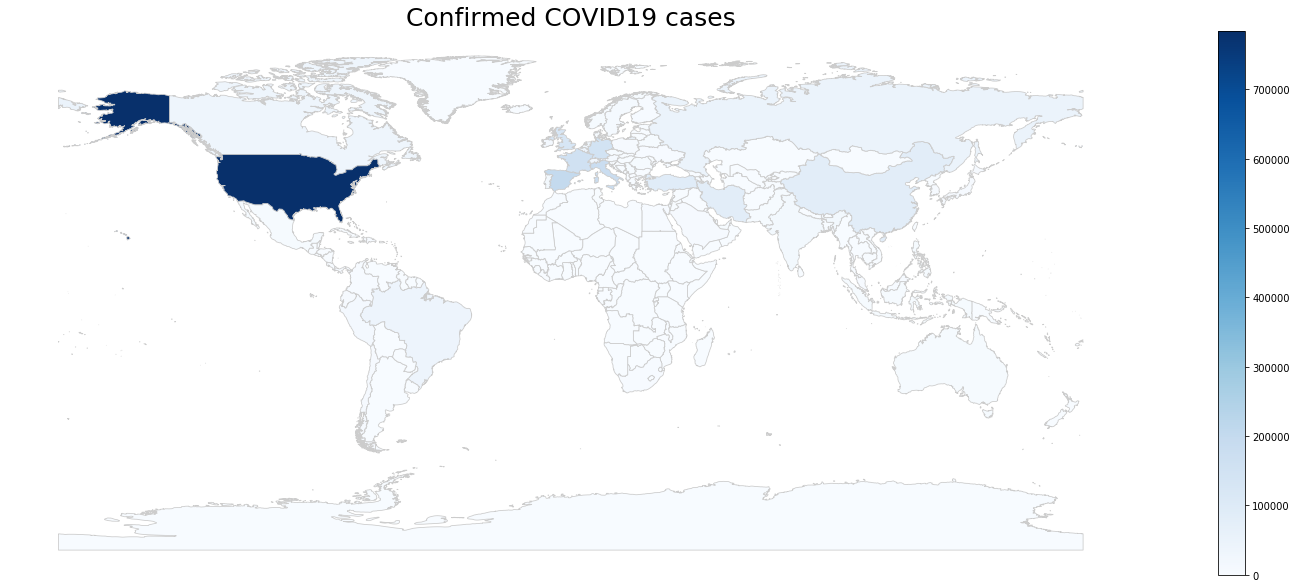

In [92]:
# set the value column that will be visualised
variable = 'Confirmed'
# set the range for the choropleth values
vmin, vmax = yoyo.Confirmed.min(), yoyo.Confirmed.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Confirmed COVID19 cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommend it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
yoyo.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8');
fig.savefig('test3.png', dpi=300)